# **Mileage Prediction - Regression Analysis**

It seeks to develop a robust and interpretable regression model that accurately estimates vehicle mileage based on relevant attributes.

This dataset was taken from the StatLib library which is maintained at Carnegie Mellon University.The dataset was used in the 1983 American Statistical Association Exposition.

# **Import Library**

In [50]:
import pandas as pd

In [51]:
import numpy as np

In [52]:
import matplotlib.pyplot as plt

In [ ]:
import seaborn as sns

# **Import Data**

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/YBI-Foundation/Dataset/main/MPG.csv')

In [ ]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [ ]:
df.nunique()

,0
mpg,129
cylinders,5
displacement,82
horsepower,93
weight,351
acceleration,95
model_year,13
origin,3
name,305


# **Data Preprocessing**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [ ]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [ ]:
df.corr(numeric_only=True) # The numeric_only parameter will only include numeric columns in the correlation calculation.

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316
model_year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000


# **Remove Missing Values**

In [ ]:
df = df.dropna()


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    object 
 8   name          392 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 30.6+ KB


# **Data Visualization**

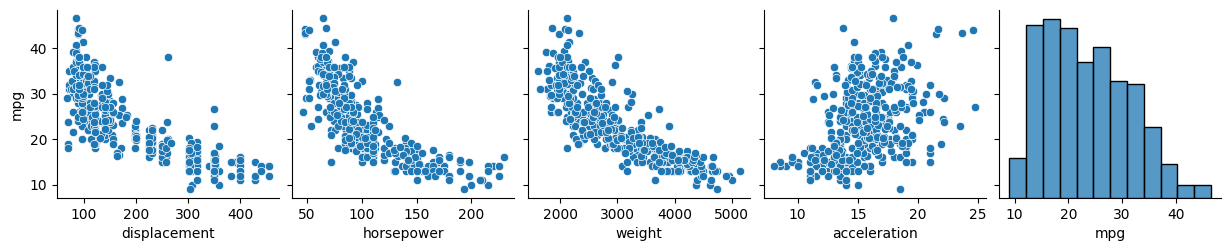

In [ ]:
sns.pairplot(df, x_vars = ['displacement', 'horsepower', 'weight', 'acceleration', 'mpg'], y_vars = 'mpg')

<Axes: xlabel='displacement', ylabel='mpg'>

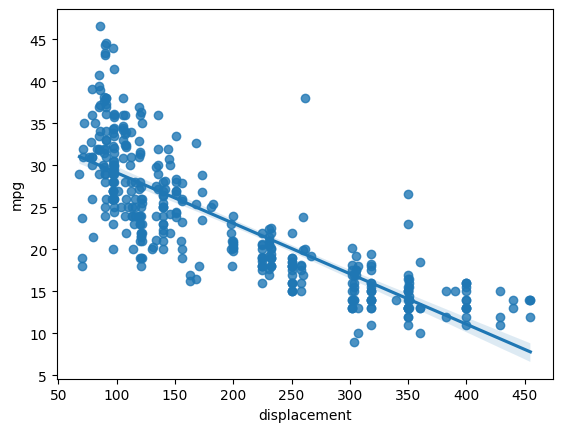

In [ ]:
sns.regplot(x = 'displacement', y = 'mpg', data = df)

# **Define Target Variable y and Feature X**

In [ ]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

In [ ]:
y = df['mpg']

In [ ]:
y.shape

(392,)

In [ ]:
x = df[['displacement', 'horsepower', 'weight', 'acceleration']]

In [ ]:
x.shape

(392, 4)

# **Scaling Data**

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
ss = StandardScaler()

In [ ]:
x = ss.fit_transform(x)

In [ ]:
pd.DataFrame(x).describe()

,0,1,2,3
count,3.920000e+02,3.920000e+02,3.920000e+02,3.920000e+02
mean,-7.250436e-17,-1.812609e-16,-1.812609e-17,4.350262e-16
std,1.001278e+00,1.001278e+00,1.001278e+00,1.001278e+00
min,-1.209563e+00,-1.520975e+00,-1.608575e+00,-2.736983e+00
25%,-8.555316e-01,-7.665929e-01,-8.868535e-01,-6.410551e-01
50%,-4.153842e-01,-2.853488e-01,-2.052109e-01,-1.499869e-02
75%,7.782764e-01,5.600800e-01,7.510927e-01,5.384714e-01
max,2.493416e+00,3.265452e+00,2.549061e+00,3.360262e+00


# **Train Test Split Data**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, train_size = 0.7)

In [ ]:
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((274, 4), (118, 4), (274,), (118,))

# **Modeling**

### **Linear Regression Model**

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression()

### **Train or Fit model**

In [ ]:
lr.fit(xtrain, ytrain)

LinearRegression()

In [ ]:
lr.intercept_

23.522879322313443

In [ ]:
lr.coef_

array([ 0.38264812, -1.63223353, -5.405316  ,  0.34373753])

Mileage = 23.6 - 0.13, Displacemet = -1.42, Horsepower = -5.23, Weight = 0.22 Acceleration + error

# **Prediction**

### **Predict Test Data**

In [ ]:
y_pred = lr.predict(xtest)

In [ ]:
y_pred

array([26.50223193, 24.90598871, 17.06273405, 27.52149653, 24.98435886,
       22.77518769, 31.66778754, 24.47701057, 31.32228551,  7.06063086,
       24.48245566, 25.64658644, 16.569032  , 27.67781371, 33.90223341,
       31.09408302, 31.60199163, 13.05854446, 32.87735605, 22.30871171,
       13.23430635, 31.67029408, 16.73405902, 27.72884098, 12.82013931,
       17.20505397,  9.90596199, 27.30105824, 24.14431484, 29.61409414,
       10.90095116, 11.8855621 , 23.06695288, 32.70181402, 15.21267617,
       19.15810557, 21.09544022, 16.89634124, 29.85226229, 25.56454746,
       13.88750989, 15.4890998 , 25.16260312, 30.00000419, 12.59811162,
       25.63427701, 11.30559153, 30.07929807, 11.06090084, 27.77639098,
       23.55368796, 19.0639336 , 29.3534441 , 26.57460526, 16.78743262,
       10.81196664, 20.94454925, 31.3696802 , 32.16422501, 26.61320793,
       14.59880415, 29.70411644, 15.62340446, 29.32530697, 27.92963707,
       17.5435949 , 26.80078899, 27.25612767, 17.97719651, 12.42

# **Model Accuracy**

In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_absolute_percentage_error

In [ ]:
mean_absolute_error(ytest, y_pred)

3.0656585677052743

In [ ]:
mean_absolute_percentage_error(ytest, y_pred)

0.1405093244210877

In [ ]:
r2_score(ytest, y_pred)

0.711825401017994

# **Polynomial Regression**

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
poly = PolynomialFeatures(degree = 2, interaction_only = True, include_bias = False)

In [ ]:
x_train2 = poly.fit_transform(xtrain)

In [ ]:
x_test2 = poly.fit_transform(xtest)

In [ ]:
lr.fit(x_train2, ytrain)

LinearRegression()

In [ ]:
lr.intercept_

21.313356143479147

In [ ]:
lr.coef_

array([-1.26878516, -5.29023204, -2.46577178, -0.83698677,  0.6949315 ,
        0.12630644,  0.10258334,  1.34316229, -0.94921824,  0.83597926])

In [ ]:
y_pred_poly = lr.predict(x_test2)

# **Model Accuracy**

In [ ]:
mean_absolute_error(ytest, y_pred_poly)

2.558440302334008

In [ ]:
mean_absolute_percentage_error(ytest, y_pred_poly)

0.10945798028788734

In [ ]:
r2_score(ytest, y_pred_poly)

0.7719857592508661

# **Explaination**

The "Mileage Prediction - Regression Analysis" project is about creating a smart tool that can guess how many miles a vehicle can travel using a certain amount of fuel. Imagine you want to know how far different cars can go before they need more gas. This project uses clever calculations and data to make an educated guess. It looks at things like the car's size, weight, and how powerful its engine is. By doing this for lots of cars, we can help people choose cars that use fuel more efficiently. It's like having a mileage fortune teller that helps you pick a car that goes a long way on a single tank of gas!